In [2]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization,LeakyReLU
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Image Colorization
## input :
RGP image
## Preprocessing & training :
resizing

convert to Lab

L = Lightness (like grayscale) (features)

ab = (red-green)&(yellow-blue) (lables)

L + ab = the original picture


<img title="a title" alt="Alt text" src="pic.jpg">

In [4]:
print(os.listdir("imge/"))

['test', 'train']


In [5]:
ImagePath="imge/train/"

(224, 224, 3)

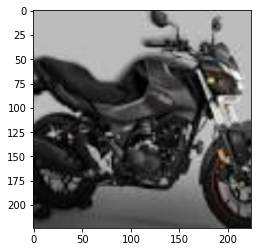

In [6]:
img = cv2.imread(ImagePath+"1.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
plt.imshow(img)
img.shape

In [7]:
HEIGHT=224
WIDTH=224
ImagePath="imge/train/"


In [8]:
def ExtractInput(path, HEIGHT,WIDTH):
    X_img=[]
    y_img=[]
    for imageDir in os.listdir(ImagePath):
        
        img = cv2.imread(ImagePath + imageDir)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
        img = img.astype(np.float32)
        img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)

        img_lab_rs = cv2.resize(img_lab, (WIDTH, HEIGHT))

        img_l = img_lab_rs[:,:,0]

        img_ab = img_lab_rs[:,:,1:]
        img_ab = img_ab/128

        X_img.append(img_l)
        y_img.append(img_ab)

        X_img = np.array(X_img)
        y_img = np.array(y_img)

        return X_img,y_img



In [9]:
X_,y_ = ExtractInput(ImagePath,HEIGHT,WIDTH)

In [10]:
def InstantiateModel(in_):
    model_ = Conv2D(16,(3,3),padding='same',strides=1)(in_)
    model_ = LeakyReLU()(model_)
    
    model_ = Conv2D(32,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    model_ = MaxPooling2D(pool_size=(2,2),padding='same')(model_)
    
    model_ = Conv2D(64,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    model_ = MaxPooling2D(pool_size=(2,2),padding='same')(model_)

    model_ = Conv2D(128,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2D(256,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = UpSampling2D((2, 2))(model_)
    model_ = Conv2D(128,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = UpSampling2D((2, 2))(model_)
    model_ = Conv2D(64,(3,3), padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    
    concat_ = concatenate([model_, in_]) 
    
    model_ = Conv2D(64,(3,3), padding='same',strides=1)(concat_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2D(32,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    
    model_ = Conv2D(2,(3,3), activation='tanh',padding='same',strides=1)(model_)

    return model_

In [11]:
Input_Sample = Input(shape=(HEIGHT, WIDTH,1))
Output_ = InstantiateModel(Input_Sample)
Model_Colourization = Model(inputs=Input_Sample, outputs=Output_)

In [12]:
LEARNING_RATE = 0.001
Model_Colourization.compile(optimizer=Adam(lr=LEARNING_RATE),
                            loss='mean_squared_error')
Model_Colourization.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 224, 224, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 4640        leaky_re_lu[0][0]                
______________________________________________________________________________________________

In [25]:
Model_Colourization.fit(X_,y_, epochs=500, shuffle = True, batch_size= 10)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 3/500
1/1 [==============================] - 0s 997us/step - loss: 0.0014
Epoch 4/500
1/1 [==============================] - 0s 998us/step - loss: 0.0014
Epoch 5/500
1/1 [==============================] - 0s 0s/step - loss: 0.0014
Epoch 6/500
1/1 [==============================] - 0s 998us/step - loss: 0.0015
Epoch 7/500
1/1 [==============================] - 0s 997us/step - loss: 0.0016
Epoch 8/500
1/1 [==============================] - 0s 997us/step - loss: 0.0016
Epoch 9/500
1/1 [==============================] - 0s 998us/step - loss: 0.0017
Epoch 10/500
1/1 [==============================] - 0s 998us/step - loss: 0.0018
Epoch 11/500
1/1 [==============================] - 0s 997us/step - loss: 0.0019
Epoch 12/500
1/1 [==============================] - 0s 997us/step - loss: 0.0019
Epoch 13/500
1/1 [==========================

In [26]:
TestImagePath="imge/test/"

In [27]:
def ExtractTestInput(ImagePath):
    img = cv2.imread(ImagePath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_ = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img_ = cv2.cvtColor(img_, cv2.COLOR_RGB2Lab)
    img_=img_.astype(np.float32)
    img_lab_rs = cv2.resize(img_, (WIDTH, HEIGHT)) 
    img_l = img_lab_rs[:,:,0] 

    img_l_reshaped = img_l.reshape(1,224,224,1)
    
    return img_l_reshaped

In [34]:
ImagePath=TestImagePath+"114.jpeg"
image_for_test = ExtractTestInput(ImagePath)

In [35]:
Prediction = Model_Colourization.predict(image_for_test)
Prediction = Prediction*128
Prediction=Prediction.reshape(224,224,2)

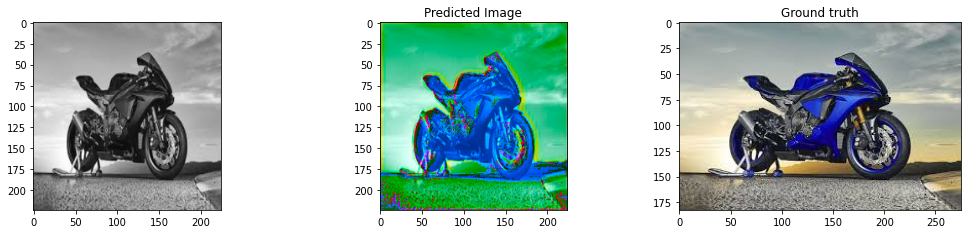

In [36]:
plt.figure(figsize=(30,20))
plt.subplot(5,5,1)
img = cv2.imread(TestImagePath+"114.jpeg")
img_1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img_1, cv2.COLOR_RGB2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img = cv2.resize(img, (224, 224))
plt.imshow(img)

plt.subplot(5,5,1+1)
img_ = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
img_[:,:,1:] = Prediction
img_ = cv2.cvtColor(img_, cv2.COLOR_Lab2RGB)
plt.title("Predicted Image")
plt.imshow(img_)

plt.subplot(5,5,1+2)
plt.title("Ground truth")
plt.imshow(img_1)